# CSC 421 - Propositional and First-Order Logic 

### Instructor: George Tzanetakis 


1. [Readings](#readings) 
2. [Introduction and Overview](#introduction)
3. [Wumpus world](#wumpus_world)
4. [Logic](#logic) 
5. [Showing Entailment](#entailment) 

<a id='readings'></a>

# ASSOCIATED READINGS  
The section numbers are based on the 4th edition of the textbook. 
They also should work for the 3rd edition. 

CHAPTER 7 LOGICAL AGENTS 

* Basic: Sections 7.1, 7.2, 7.3, 7.4, and Summary
* Expected: 7.5 
* Advanced: All the chapter including bibliographical and historical notes

<a id='introduction'></a>


# INTRODUCTION AND OVERVIEW 
Knowledge-based agents use a process of **reasoning** over an internal **representation** of knowledge to decide what actions to take. 

The key insight is that by using a factored representation (like we did in CSP problems) some parts of the agent can work in a domain-independent fashion. That way information can be combined in different ways, the agents can adapt to new environments and explicitly describe goals. 

We begin by exploring **propositional logic** which is a less expressive subset of **first-order logic**. 



**KNOWLEDGE BASE** is a set of sentences in some kind of **knowledge representation language**. **Axioms** are sentences that are given. 

1. **TELL**: adds sentences to the KB 
2. **ASK**: a question of the knowledge base KB
3. **inference**: derives new sentences from old sentences - can be used in either **TELL** or **ASK**



A **declarative** approach to system building only **TELLS** what the system needs to know and the system figures out **how** to accomplish a particular task. In constrast a **procedural** approach encodes the desired behaviors directly as program code. In the 1970s and 1980s, advocates of these two approaches engaged in heated debates. Most successful agents often combine both declarative and procedural elements in their design. 

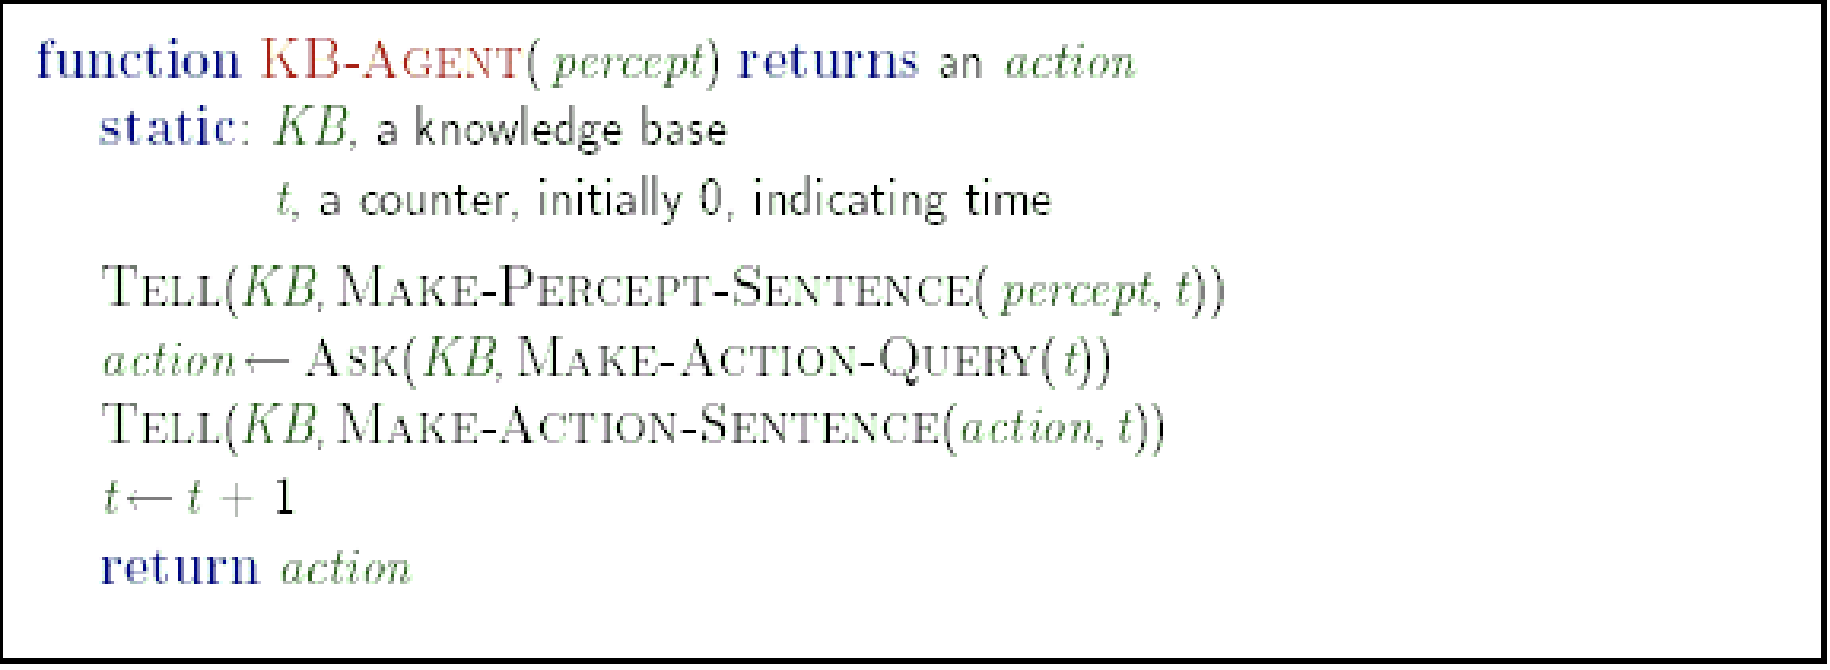


## Knowledge-based agent 

Each time the agent program is called, it does three things: 

1. TELLS the KB what it perceives
2. ASKS the KB what action it should perform (in the process of answering this query, reasoning is performed about the current state of the world, outcomes of possible action sequences, etc.
3. TELLS the KB what action was chosen and then the agent executes the action


## Historical sidenote 




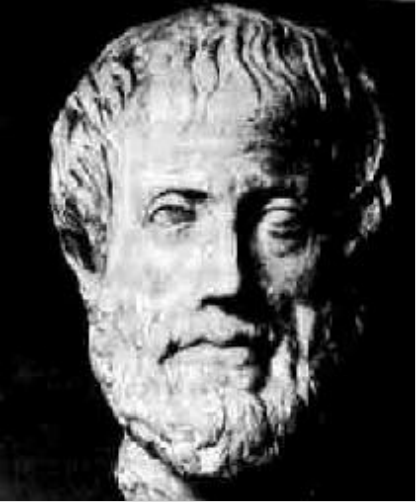

* Concept of proof = series of immediately obvious reasoning steps
* Steps of proof is obvious based on form rather than content

One of the many important contributions of Aristotle. Examples

* All x are y
* All y are z
* Therefore all x are z
* X = dogs, Y = mammals, Z = animals
* X = Accords, Y = Hondas, Z = Japanese

<a id='wumpus_world'></a>

# The WUMPUS world

Wumpus can be shot but agent only has one arrow. Some roooms contain bottomless pits. One location contains gold. 

* **Performance measure:**: +1000 for climbing out of the cave with the gold, -1000 for falling into a pit or being eaten by wumpus, -1 for each action taken, and -10 for using the arrrow. The game ends when the agent dies or when the agent climbs out of the cave.
* **Environment:**: A $4 x 4$ grid of rooms. The agent always starts in the square labeled $[1,1]$ facing to the right. The locations of the gold and wumpus are chosen randomly with a uniform distribution. Each square other than the start can be a pit, with probability 0.2.
* **Actuators:** The agent can move *Forward*, *TurnLeft* by $90^o$, or *TurnRight* by $90^o$. The agent dies a horrible death if it enters a square with a pit or wumpus (unless the wumpus is dead). If an agent tries to move forward and bumps into wall, it stays in the same square. The action *Grab* can be used to pick up the gold if it is in the same square as the agent. The action *Shoot* can be used to fire an arrow in a stright line in the direction the agent is facing. The arrow continues until it either hits (and kills) the Wumpus or hits a wall. The agent has only one arrow. Fianll, the action *Climb* can be used to climb out of the cave, but only from square (1,1). 
* **Sensors:** The agent has five sensors, each of which gives a single bit of information:
    * In the square containing the wumpus and directly adjacent (not diagonally) squares, the agent with perceive a *Stench*.
    * In the squares directly adjacent to a pit, the agent will perceive a *Breeze*
    * In the square where the gold is, the agent will perceive a *Glitter*
    * When the agent walk into a wall, it will perceive a *Bump*
    * When the wumpus is killed, it emits a woeful *Scream* that can be perceived from anywhere in the cave 
  




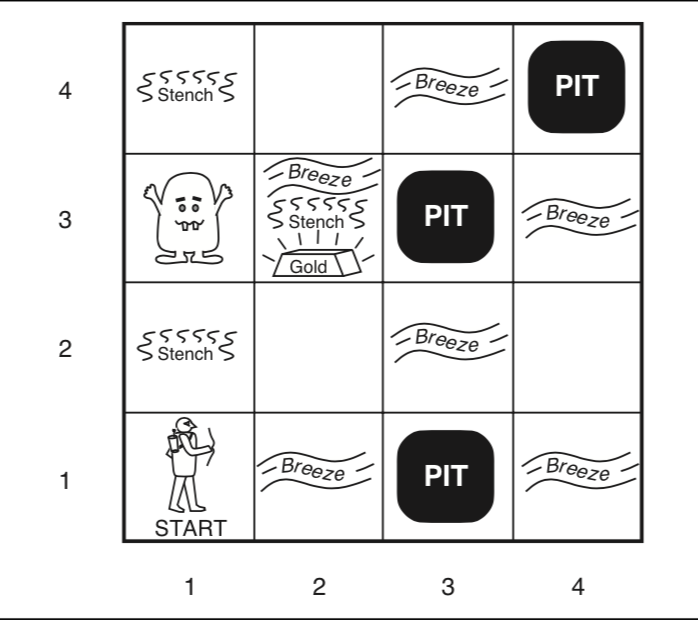







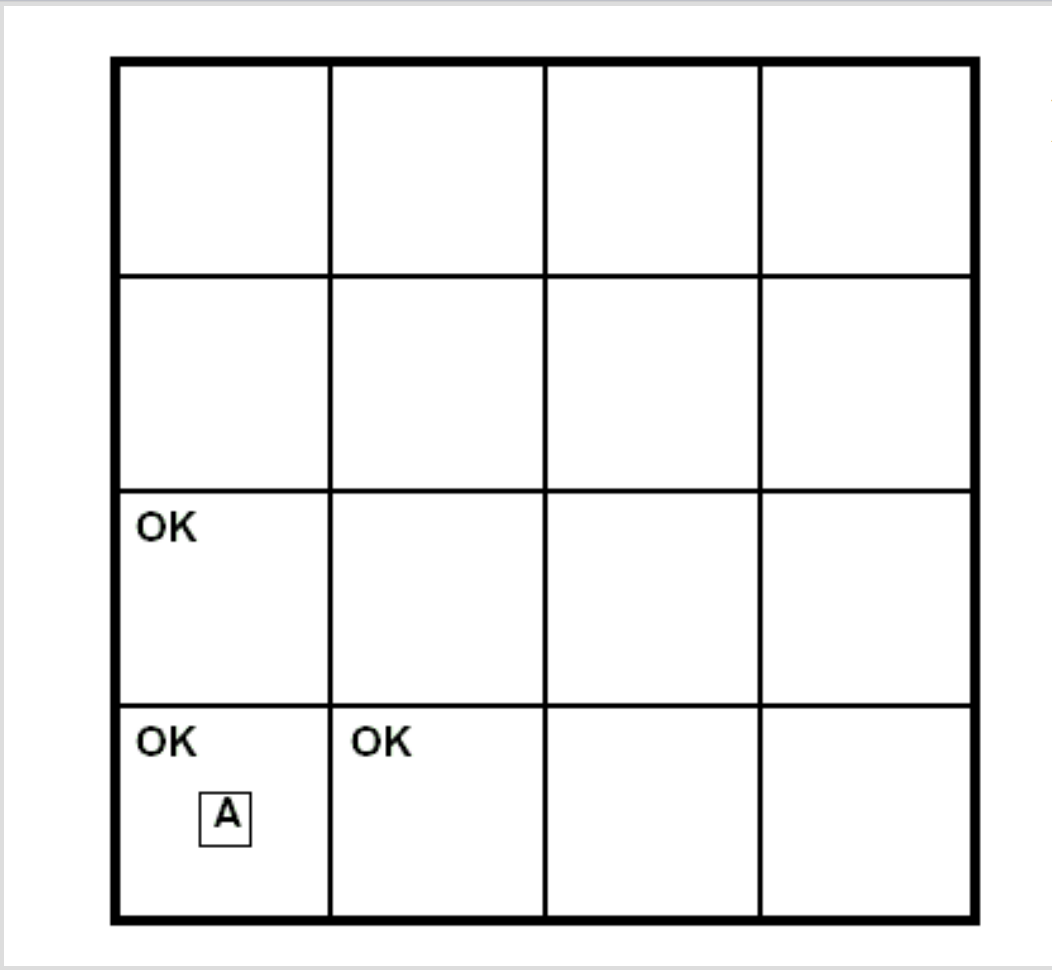

* Percept = $[Stench,Breeze,Glitter,Bump,WumpusDead]$
* Percept = $[Stench = None, Breeze = None, Glitter = None, Bump = None, WumpusDead = None]$





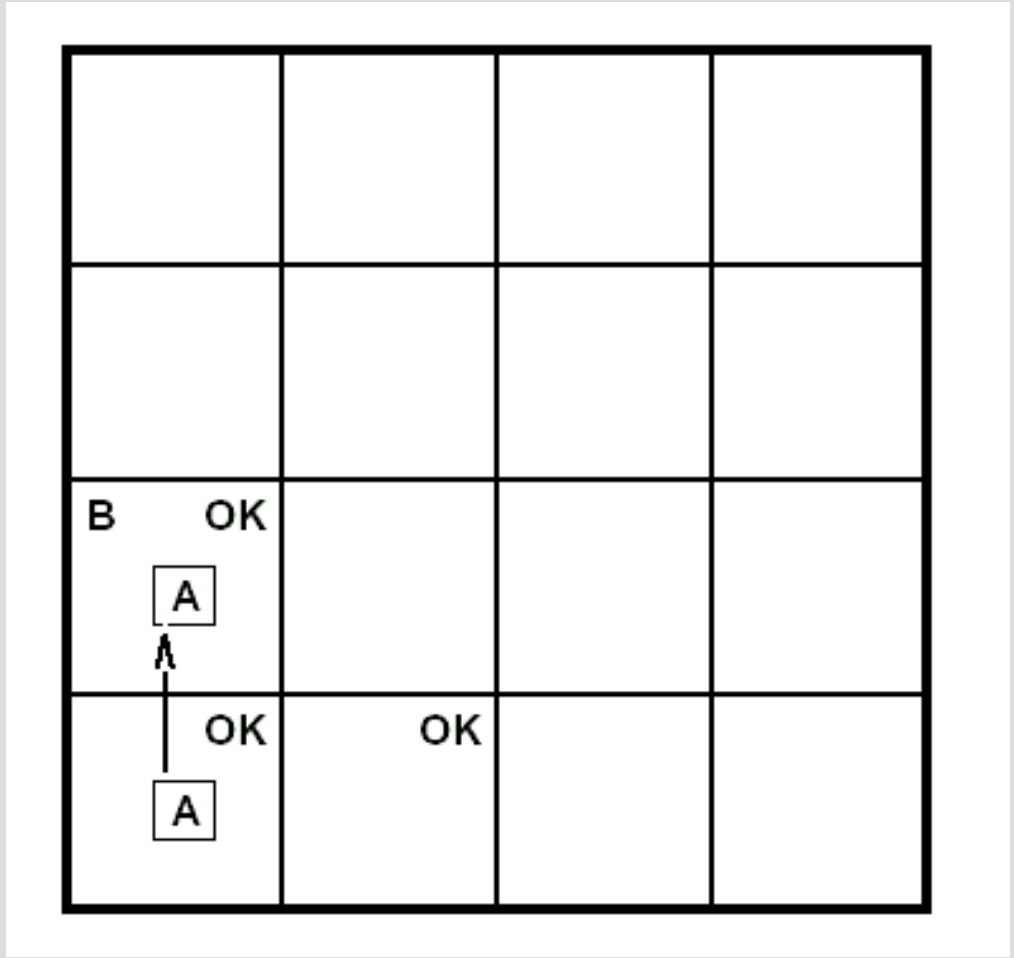
Percept = $[none, breeze, none, none, none]$

<img src="images/wumpus3.png" width="50%"/>

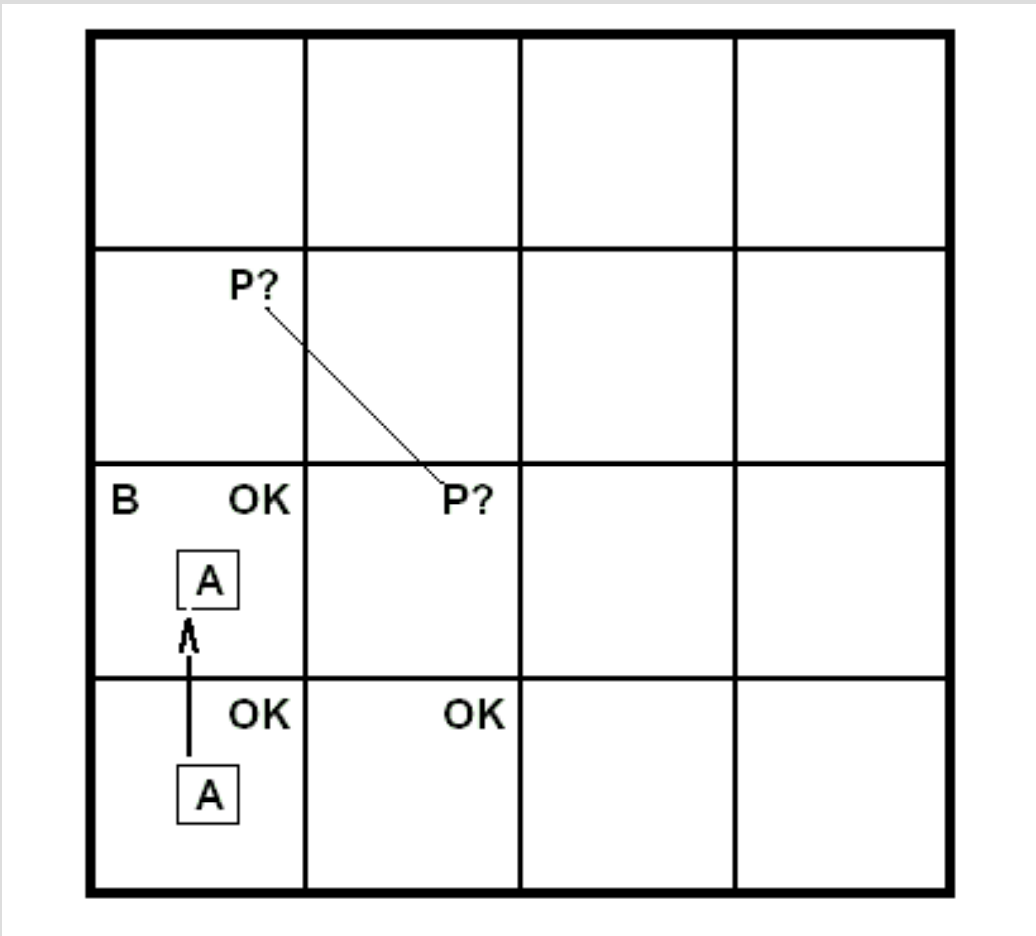
Inference 


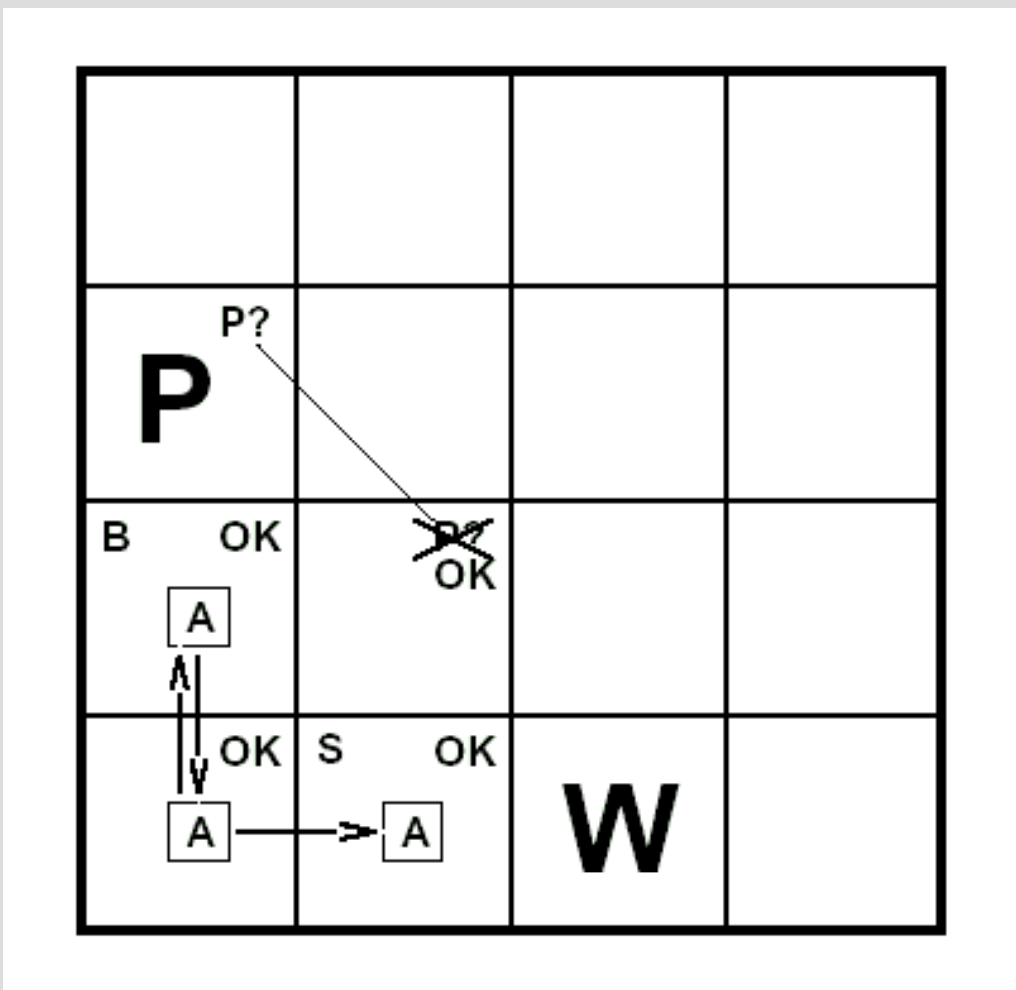

The agent has “deduced” the location of the pit and the wumpus without falling into a horrible death or being eaten alive by the hungry wumpus. 

Note that in each case for which the agent draws a conclusion from the available information, that conclusion is *guaranteed* to be correct if the available information is correct. This is a fundamental property of **logical reasoning**. 


<a id='logic'></a>

# Logic 
## Logics 

* Formal languages for encoding information
* Legal transformations
* Syntax defines the sentences in the language
* Semantics define the “meaning” of a sentence i.e define the truth of a sentence in a world
* For example
    * x + 2 >= y is true in a world where x = 5 and y = 2
    * x + 2 >= y is false in a world where x = 2 and y = 10

A **model** is a mathematical abstraction that fixes the TRUE or FALSE value of each relevant sentence that corresponds 
to a possible world in the problem we are modeling. 

In [ ]:
5 + 3 + x = 10 - 2x 
5 + 3 - 10 = -x -2x 

## Entailment

* Entailment means that one thing follows from another:
* KB |= a
* KB entails sentence a iff a is true in all worlds where the KB is true
* X + Y = 4 entail X – 4 = - Y
* Entailment is a relationship between sentences (syntax) that is based on semantics 


In logics we will use the term of world to mean an assignment of values to variables similar to the variable 
assignments we used for CSP problems. 



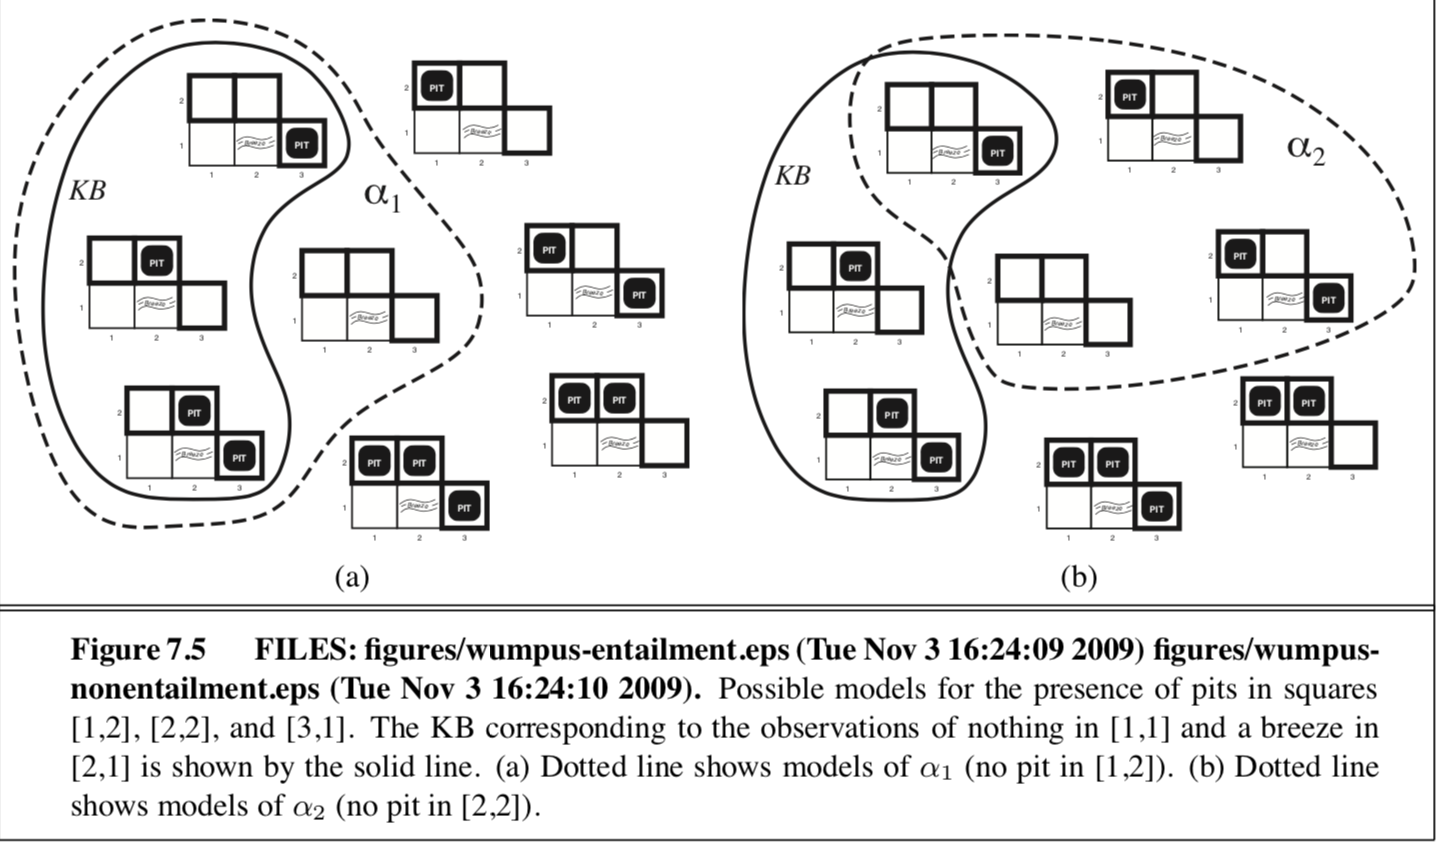

**Logical Inference** through **model checking**. Enumerate all possible models to check that $\alpha$ is true in all models in which KB is true i.e $M(KB) \subseteq M(\alpha)$

Let's look at a hypothetical example. Somebody tells you that a student is either taking an AI class or a Data Mining 
class or both. Another person tells you that the same student is either taking a Data Mining class or a Visualization class or 
both. Can we conclude that the student is either taking Data Mining or Visualization or both ? 

A: takes AI 
B: takes Data Mining 
C: takes Visualization 

```
A  B   C     ((A or B) AND (B or C))       (A OR C)
T  T   T               T                       T
T  T   F               T                       T
T  F   T               T                       T
T  F   F               F                       T
F  T   T               T                       T 
F  T   F               T                       F
F  F   T               T                       T
F  F   F               F                       F
```

## Inference 

* KB |=i a sentence a can be derived by procedure **i** (the inference procedure)
* Consequences of KB are haystack, a is needle
    * Entailment: needle in haystack
    * Inference: finding it
* Sound: whenever KB |=i a it is also true that KB |= a
* Completeness: i is complete if whenever KB |= a it is also true that KB |=i




## Propositional Logic Syntax and Semantics 

* Syntax: specifies how sentences/expressions are formed by combining symbols 
* Semantics: specifies how we interpret these expressions 



* Propositional symbols $P_1$, $P_2$, WUMPUS-DEAD are sentences 
* If $S$ is a sentence so is $\neg S$ (negation) 
* If $S_1$ and $S_2$ are sentences then $S_1 \wedge S_2$ is a sentence (conjunction)
* If $S_1$ and $S_2$ are sentences then $S_1 \lor S_2$ is a sentence (disjunction) 
* If $S_1$ and $S_2$ are sentences then $S_1 \Rightarrow S_2$ is a sentence (implication) 
* If $S_1$ and $S_2$ are sentences then $S_1 \Leftrightarrow S_2$ is a sentence (biconditional)


Use brackets to indicate precedence. 
The truth table below shows the semantics of how true/false values are combined 
using the logical operators. 

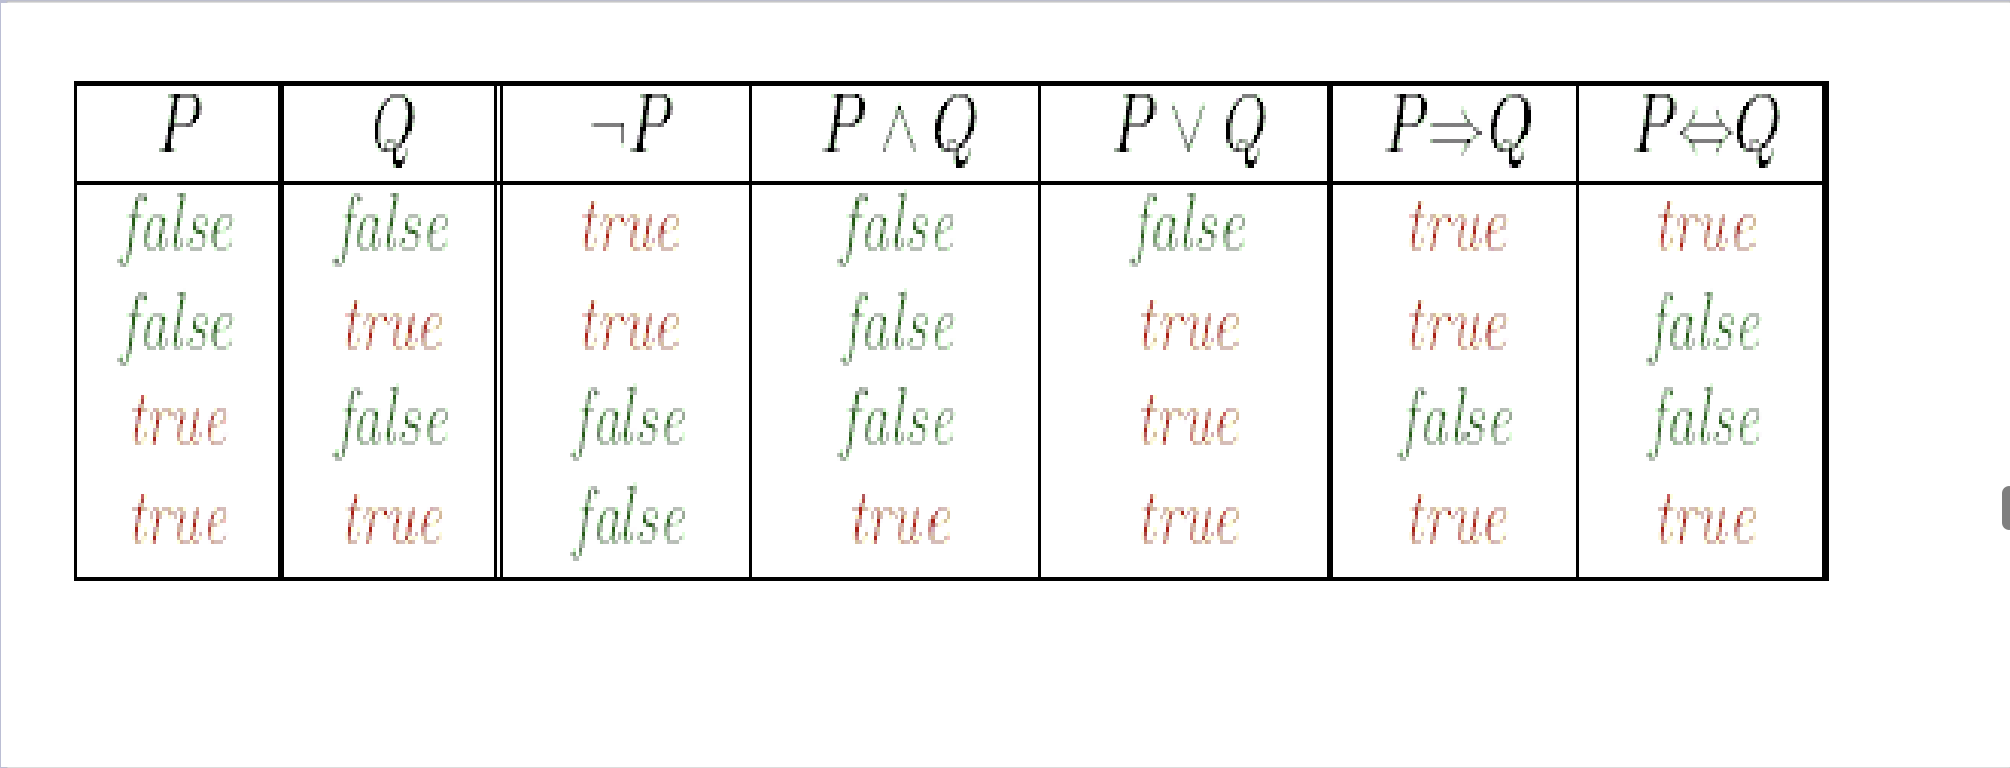


A **model** specifies a True/False value for every propositional symbol (similar to an assignment of values to variables in CSP). A simple recursive procedure can be used to evaluate any sentence as True/False given as input a **model**

## Wumpus world sentences 


* Let $P_{ij}$ be true if there is a pit in $[i,j]$
* Let $B_{ij}$ be true if there is breeze in $[i,j]$ 


How can you express “Pits cause breeze in adjacent squares” ? 

$B_{11} \Leftrightarrow (P_{12} \lor P_{21})$ <br> 
$B_{21} \Leftrightarrow (P_{11} \lor P_{22} \lor P_{31})$ <br> 
$\dots$

Notice that a single sentence in English has to be expanded to several propositional logic sentences. 
In propositional logic we need to state that pits cause breeze in adjacent square specifically for 
every single pit and square. 



## Agents based on Propositional Logic 

In order to create effective agents using propositional logic we need to do two things: 

1. Enable the agent to deduce, to the extent possible, the state of the word given its percept history 
2. Show how the agent can use logical inference to construct plans to achieve its goals based on what it knows about the state of the world. 

KNOWLEDGE BASE = AXIOMS (how the world operates) + PERCEPT SENTENCES (what it perceives) 

We have seen how to express how breezy and stench operate: 


How can you express “Pits cause breeze in adjacent squares” ? 

$B_{11} \Leftrightarrow (P_{12} \lor P_{21})$ <br> 
$B_{21} \Leftrightarrow (P_{11} \lor P_{22} \lor P_{31})$ <br> 
$\dots$

How can you express “Squary is smelly if and only if a neighboring square has a wumpus” ? 

$S_{11} \Leftrightarrow (W_{12} \lor W_{21})$ <br> 
$\dots$ 

How can we express there is exactly one wumpus? We need to say there is at least one wumpus: 

$W_{1,1} \lor W_{1,2} \lor \dots \lor W_{4,3} \lor W_{4,4}$

That is necessary but not sufficient - we also have say there is at most one wumpus. To do this for each pair of locations, we add a sentence saying that at least one of them must be wumpus free. 

$$\neg W_{1,1} \lor \neg W_{1,2}$$
$$\neg W_{1,1} \lor \neg W_{1,3}$$
$$\neg W_{1,1} \lor \neg W_{1,2}$$
$$\neg W_{4,4} \lor \neg W_{4,4}$$

We can also use propositional variables for percepts. However there are situations in which the percepts might change over time in which this approach would not work. For example if the Wumpus moved around in the world there could be a stench at a particular location for example $S_{2,2}$ at a particular time but no stentch $\neg S_{2,2}$ at a later time. 

To solve this problem we need to add more propositional variables for each percept that are indexed by time.  In that case $S^3_{2,2}$ can be true and $S^{4}_{2,2}$ can be false where $3$ and $4$ a superscript indices referring to the corresponding time step. Such propositional variables are called 
**fluents**. 

Now we can more accurately model the relationship between a property of the world and the associated percept. If $L_{x,y}$ represents the location of the agent then we have: 

$$ L^{t}_{x,y} \rightarrow (Breeze^{t} \leftrightarrow B_{x,y})$$

Now we can start representing the **transition model** of the agent. The percept for a given time step happens first, followed by the action for that time step, followed by the transition to the next step. 


**Effect axioms** 

$$L^{0}_{1,1} \land FacingEast^{0} \land Forward^{0} \rightarrow L^{1}_{2,1} \land \neg L^{1}_{1,1}$$

How would this effect axiom be for the snake game where the "snake" gets longer at every time step ? 
We would need sentences like this for each possible time step, for each of the locations and for each of the orientations. 

In addition to any changes we need to assert from each time step to the next time step which aspects of the world remain unchanged. This gives rise to the **frame problem**. 

One solution would be to add **frame axioms** explicitly asserting all the propositions that remain the same. For example for each time $t$ we would have: 

$$Forward^{t} \rightarrow (HaveArrow^{t} \leftrightarrow HaveArrow^{t+1})$$
$$Forward^{t} \rightarrow (WumpusAlive^{t} \leftrightarrow WumpusAlive^{t+1})$$
$$\dots$$

Although this works it leads to a proliferation of frame axioms which seems very inefficient. If we have $m$ actions and $n$ fluents we would need a $O(mn)$ set of frame axioms. This is called the **representational frame problem**. 

The representational frame problem is an important challenge becuase the world has very many fluents. Fortunately the world exhibits **locality** i.e each action changes on more than some small number **k** of these fluents. 

Change the representaion to **succesor-state axioms**. Instead of focusing on actions we focus on fluents. For every fluent $F$, we will have an axiom that defines the truth value of $F^{t+1}$ in terms of fluents at time $t$ including $F^{t}$ itself and the actions that may have occured at time $t$. This looks like this: 

$$ 
F^{t+1} \leftrightarrow ActionCausesF^{t} \lor (F^{t} \land \neg ActionCausesNotF^{t})
$$

For example:  
$$
HaveArrow^{t+1} \leftrightarrow (HaveArrow^{t} \land \neg Shoot^{t})
$$

We can utilize logical inference to determine which squares are safe and then use A* search to make plans or we can make plans by logical inference. 







In [ ]:
!pip install ipythonblocks

In [ ]:
from utils import *
from logic import *

We define the symbols we use in our clauses.
𝑃𝑥,𝑦  is true if there is a pit in [x, y].
𝐵𝑥,𝑦  is true if the agent senses breeze in [x, y].

In [ ]:
P11, P12, P21, P22, P31, B11, B21 = expr('P11, P12, P21, P22, P31, B11, B21')

Now we tell sentences based on `section 7.4.3`.<br/>
There is no pit in `[1,1]`.

In [ ]:
wumpus_kb.tell(~P11)

A square is breezy if and only if there is a pit in a neighboring square. This has to be stated for each square but for now, we include just the relevant squares.

In [ ]:
wumpus_kb.tell(B11 | '<=>' | ((P12 | P21)))
wumpus_kb.tell(B21 | '<=>' | ((P11 | P22 | P31)))

Now we include the breeze percepts for the first two squares leading up to the situation in `Figure 7.3(b)`

In [ ]:
wumpus_kb.tell(~B11)
wumpus_kb.tell(B21)

In [ ]:
wumpus_kb.clauses

In [ ]:
wumpus_kb.ask_if_true(~P11), wumpus_kb.ask_if_true(P11)

In all models in which the knowledge base is `True`, $P_{1, 1}$ is `False`. It makes sense that `ask_if_true()` returns `True` for $\alpha = \neg P_{1, 1}$ and `False` for $\alpha = P_{1, 1}$. This begs the question, what if $\alpha$ is `True` in only a portion of all models. Do we return `True` or `False`? This doesn't rule out the possibility of $\alpha$ being `True` but it is not entailed by the `KB` so we return `False` in such cases. We can see this is the case for $P_{2, 2}$ and $P_{3, 1}$.

In [ ]:
wumpus_kb.ask_if_true(~P22), wumpus_kb.ask_if_true(P22)

## Propositional Theorem Proving


We have shown how we can determine entailment by **model checking**: enumerating all possible models and showing that the sentence must hold in all models. 

Entailment can also be done by **theorem proving** - applying rules of inference directly to the sentenes in our knowledge base to construct a proof of the desired sentence. When the number of models is large, **theorem** proving can be much more efficient. Proofs can ignore "irrelevant" propositions. 


**Logical equivalence** two sentences are logically equivalent if they are true in the same set of models. 
These equivalances play the same role in logic that arithmetic identities play in ordinary mathematics. 

An example would be commutivity of $\neg$ $(\alpha \lor \beta) \equiv (\neg \beta \wedge \neg \alpha)$ or biconditional elimination. 

A **valid** sentence is true in **all** models.  

A sentence is **satisfiable** is it is true in by **some** model. 

**Deduction theorem** 

For any sentences $\alpha$ and $\beta$, $\alpha \vDash \beta$ if and only if the sentence $(\alpha \Rightarrow \beta)$ is valid 

**Proof by contradiction (reduction ad absurdum)** 

$\alpha \vDash \beta$ if and only if the sentence $(\alpha \wedge \neg \beta)$ is unsatisfiable. 





<a id='entailment'></a>

## Practice for midterm 

Have a KB consisting 3-4 variables sometimes directly specified sometimes described in human language 
and a sentence that you want to prove is entailed by the KB. 

1) Show it by model checking that the models in which the KB is true are a subset of the models in which the sentence is true
2) Show it by the deduction theorem as a single expression with implication and showing that it is true in all possible models 
3) Show it by using proof by contradiction 

Consider three propositional logic boolean variables $A$, $B$, and $C$.Show that the sentence $A \lor (B \land C)$ 
entails the sentence $(A \lor B)$ using model checking, the deduction theorem, and by contradiction. 

Let's make this concrete by assuming that $A$ is I like basketball, $B$ is I am a professor and $C$ is I am in Greece. In that case the entailment could be expressed as if I like basketball or I am a professor and I am in Greece then 
I like basketball or I am a professor. 

|Row| $$A$$| $$B$$ | $$C$$ | $$B \land C$$ | $$A \lor (B \land C)$$   | $$A \lor B$$  |
|:-:|:----:|:-----:|:-----:|:-------------:|:------------------------:|:-------------:|
| 1 | F    | F     | F     | F             | F                        | F             |
| 2 | F    | F     | T     | F             | F                        | F             |
| 3 | F    | T     | F     | F             | F                        | T             |
| 4 | F    | T     | T     | T             | T                        | T             |
| 5 | T    | F     | F     | F             | T                        | T             |                                         
| 6 | T    | F     | T     | F             | T                        | T             |
| 7 | T    | T     | F     | F             | T                        | T             |
| 8 | T    | T     | T     | T             | T                        | T             |

To show this entailment using model checking we need to show that the set of world in which the premise is true is a subset of the worlds in which the premise is true. From the truth table we can see that the premise is true for the worlds that correspond to the rows 4,5,6,7,8 which is a subset of the worlds in which the premise is true 3,4,5,6,7,8. The reverse direction is not true i.e $A \lor B$ does NOT entail $A \lor (B \land C)$ because the worlds in which $A \lor B$ is true are 3,4,5,6,7,8 which is NOT a subset of the worlds in whcih $A \lor (B \land C)$ is true which are 4,5,6,7,8. 

Let's now show entailment using the deduction theorem. 

|Row| $$A$$| $$B$$ | $$C$$ | $$B \land C$$ | $$A \lor (B \land C)$$ |$$A \lor B$$|$$A \lor (B \land C) \rightarrow$$ $$A \lor B  $$| 
|:-:|:----:|:-----:|:-----:|:-------------:|:----------------------:|:---------:|:------------------------------------------:|
| 1 | F    | F     | F     | F             | F                      | F         |  T                                         |
| 2 | F    | F     | T     | F             | F                      | F         |  T                                         |
| 3 | F    | T     | F     | F             | F                      | T         |  T                                         |
| 4 | F    | T     | T     | T             | T                      | T         |  T                                         |
| 5 | T    | F     | F     | F             | T                      | T         |  T                                         |
| 6 | T    | F     | T     | F             | T                      | T         |  T                                         |
| 7 | T    | T     | F     | F             | T                      | T         |  T                                         |
| 8 | T    | T     | T     | T             | T                      | T         |  T                                         |

The last column is calculated by using the truth table for implication and based on the previous two columns corresponding to the premise and consequent. 

Finally let's show entailment using proof by contradiction. In this case we need to show that the sentence: 
$(A \lor (B \land C)) \land \neg (A \lor B)$ is False in all possible worlds. 


|Row| $$A$$| $$B$$ | $$C$$ | $$B \land C$$ | $$A \lor (B \land C)$$ |$$ \neg (A \lor B)$$|$$(A \lor (B \land C)) \land $$ $$\neg (A \lor B)  $$| 
|:-:|:----:|:-----:|:-----:|:-------------:|:----------------------:|:---------:|:------------------------------------------:|
| 1 | F    | F     | F     | F             | F                      | T         |  F                                         |
| 2 | F    | F     | T     | F             | F                      | T         |  F                                         |
| 3 | F    | T     | F     | F             | F                      | F         |  F                                         |
| 4 | F    | T     | T     | T             | T                      | F         |  F                                         |
| 5 | T    | F     | F     | F             | T                      | F         |  F                                         |
| 6 | T    | F     | T     | F             | T                      | F         |  F                                         |
| 7 | T    | T     | F     | F             | T                      | F         |  F                                         |
| 8 | T    | T     | T     | T             | T                      | F         |  F                                         |


# First-Order Logic 



Programming languages (such as C++, Java, or Python) are the largest class of formal languages in common use. Data structures within programs caan be used to represent facts (for example a 4x4 array can be used to represent the contents of the Wumpus world). However, they lack a general mechanism for deriving facts from other facts. 
In logic is **declarative** so that knowledge is domain-specific but inference is general and domain independent. 
In programming languages there is no easy way to express partial information/knowledge (pit in [2,2] or [3,1])


Propositional logic is very verbose when dealing with multiple objects - there is no way to generalize rules for all objects. For example "Squares adjacent to pits are breezy" can only be expressed as multiple propostional sentences for every possible square and pit. 


### Sidenote I 

Natural languages (like English or Greek) are very expressive so perhaps they could be used for representation. However, they are complicated and more geared toward communication rather than representation. For example when we say "Look" we don't represent a fact but rather convey information that depends on context. 


**Sapir-Whorf** hypothis claims that our understanding of the world is strongly influenced by the language we speak. For example there are words in different languages that can not be directly translated. An example 
would be Φιλότιμο. It is a composite word consisting of Φιλία (friendship) and Τιμή (honour) and refers 
to respecting honour, prioritizing the well being of others and not yourself. Notice although there is no one to one translation I was able to communicate to you the underlying meaning. 

Do you think verbally (Voice in your head?) or do we use non-verbal representations ? 


### Sidenote II 

Speakers of the Australian aboriginal language (Guugu Yimithirr) have no words for egocentric directions such as front, back, right, left. Instead they use absolute directions - for example "My north arm is hurting". They are better at navigation even in a virtual reality environment than English speakers. 


### Sidenote (WEIRD) III 

 There have been a lot of studies in cognitive science/psychology that assume that our perception or cognitive processes are not dependent on culture. In recent years it has been found that this is not the case. A lot of therse studies use the most readily available subjects i.e undergraduate students at Universities. A common acronym used for such subjects is **WEIRD**. The assumptions was that for things like what food or music someone likes culture is extremely important but perception and cognition are more universal.  **WEIRD** stands for Western, educated, and from industrialized, rich, and democratic countries. 
 
 
 
 
 <img src="images/weird_illusion.png" width="75%"/>

 
For the **San** people of the **Kalahari** desert this is not an illusion although it is clearly an illusion 
for **WEIRD** subjects. 


See the classic paper by Joe Henrich: 
https://www2.psych.ubc.ca/~henrich/pdfs/WeirdPeople.pdf

## First-Order Logic 

1. **Objects**  (squares, pits, wumpuses) nouns and noun phrases 
2. **Relationships** (breezy, adjacent to, shoots) verbs, verb phrases, adjectives, adverbs 

For example "Squares neighboring the wumpus are smelly"

* Objects: wumpus, squares 
* Property: smelly 
* Relationship: neighboring 

## Syntax and Semantics for FOL 

Example domain (5 objects): Richard, John, left leg of Richard, left leg of John, and crown 

Relationships are sets of tupples (explicit enumeration similar to CSP): 
<Richard, John> 
<John, Richard> 

Unary relations or properties: "person" property is True of Richard and John 

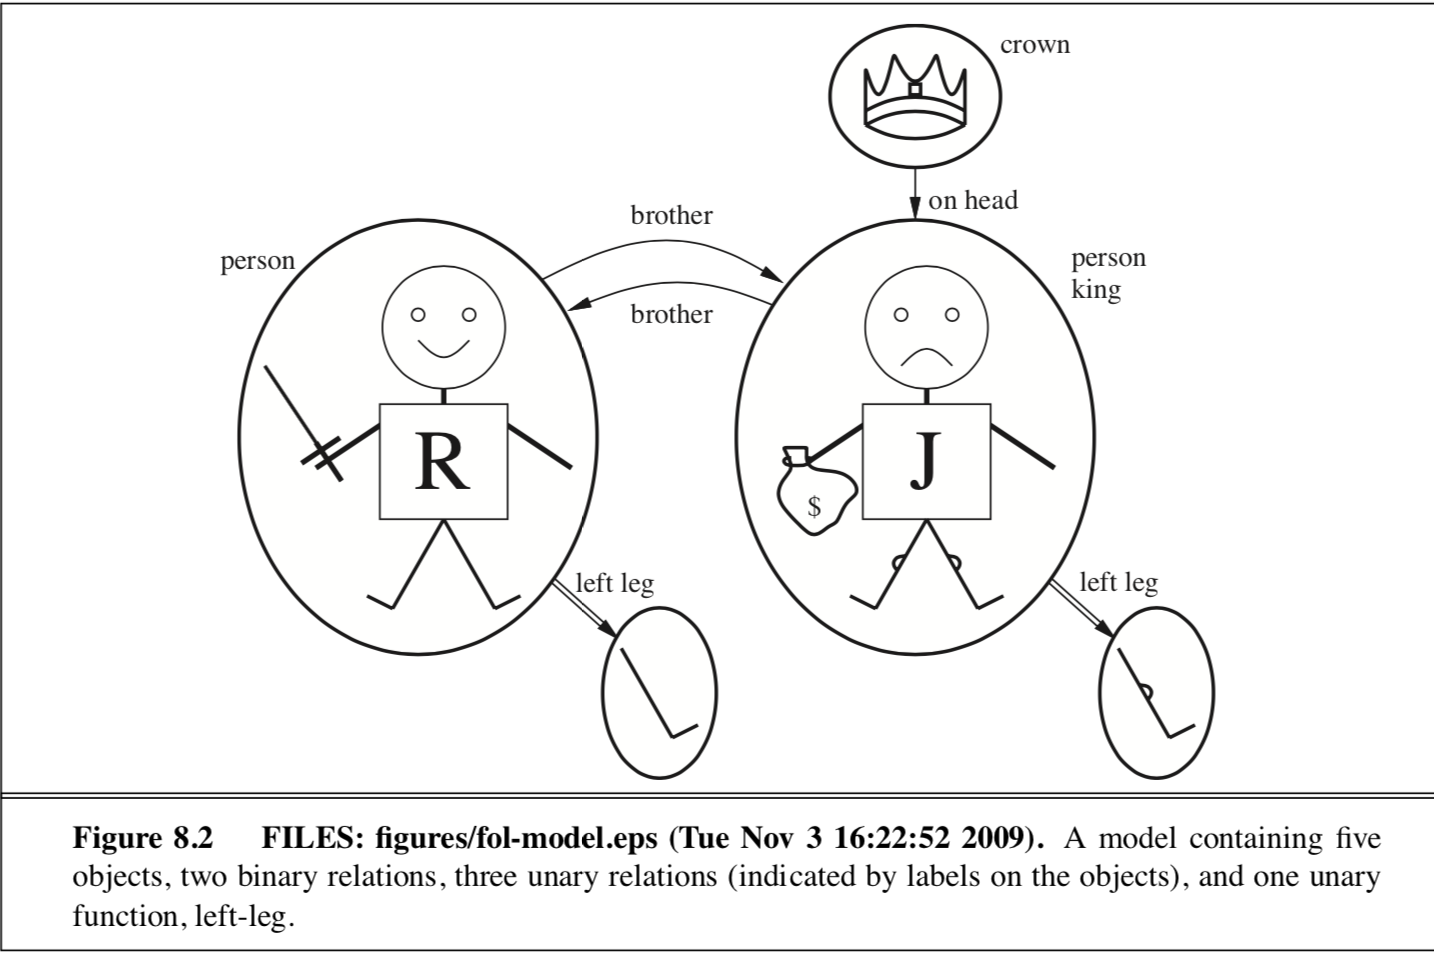

## Syntax 

**Constant symbols** stand for objects 
**Predicate symbols** stand for relationships 
**Function symbols** stand for functions 

Each predicate and function symbol comes with an **arity** that fixes the number of arguments. 

**Functions** can have multiple argument but are just a different way of referring to an object. 
The dog walker of Gemma and Fido refers to a person. 
Helen walks Gemma and Fido (Gemma and Fido are walked by Helen) -> state that a relationship is true 

* **Atomic sentences** state facts about objects 
* **Complex sentences** are formed by using **logical connectives** to construct more complex sentences. 
* **Quantifiers** express properties of entire collections of objects 
* **Universal quantifier** $\forall$ All kings are persons can be written as $\forall x King(x) \Rightarrow Person(x)$

The symbol $x$ is called a **variable**. Variables are written as lower case letters. 

### Universal quantification $\forall$

All kings are persons can be written as $\forall x King(x) \Rightarrow Person(x)$

For all x, if x is a king then x is person. 

One way to think about this is as a pattern for generating sentences with specific objects. 
For example we can have $x$ be Richard or John or any other object (in our domain the leg of John, the leg of Richard, or the crown). 

Here are the generated sentences: 

* Richard is king $\Rightarrow$ Richard is a person 
* John is king $\Rightarrow$ John is a person 
* Richard's left leg is a king $\Rightarrow$ Richard's left leg is a person 
* John's left leg is a king $\Rightarrow$ John's left leg is a person 
* The crown is a king $\Rightarrow$ the crown is a person 

Note that implication is true whenever the premise is false - regardless of the truth of the conculsion. 
By using **implication** we end up asserting the conclusion of the rule just for those ojbects for which the premise is true and saying nothing at all about those objects for which the premise is false. 

A common mistake is to use conjuction $\wedge$ instead of implication: $\forall x King(x) \wedge Person(x)$
This would expand to: 
* Richard is a king $\wedge$ Richard is a person. 
* John is a king $\wedge$ John is a person. 
* Richard's left leg is a king $\wedge$ Richard's left leg is a person. 
* ... 

Obviously this is not what we want. 

### Existential quantification $\exists$

King John has a crown on his head <br> 
$\exists x Crown(x) \wedge OnHead(x, John)$ 

The sentence is true in *at least* one sentence when substituting the variable x with specific objects. 
For example at least one of the following is true: 

* Richard is a crown $\wedge$ Rich is on John's head 
* John is a crown $\wedge$ John is on Jonh's head 
* Richard's left leg is crown $\wedge$ Richard's left leg is on John's head 
* John's left leg is a crown $\wedge$ John's left leg is on John's head 
* The crown is a crown $\wedge$ the crown is on John's head. 

For existential quantificaiton the natural connective to use is $wedge$. 
Notice that using implication does not work well. For example consider 

* $\exists x Crown(x) \Rightarrow OnHead(x,John)$ 

Expands to: 
* Richard is crown $\Rightarrow$ Ricahrd is on John's head 
* John is a crown $\Rightarrow$ John is on John's head 

If Richard is not a crown then the first assertion is true and the existential is satisfied 
which is not what we want. 


### Equality symbol 

The equality symbol is used to indicate that two terms refer to the same object. 
For exampole Father(Bart) = Homer 


### Translating English to FOL 

I strongly advise to use parentheses instead of relying on precedence of operators. 
Also notice that there are always several (equivalent) sentences in first0-order logic 
that correspond to a given English sentence. 

In predicates a common convention is that the first argument is treated as the subject. For example 
"The father of Bart is Homer) is written as father(Bart, Homer) rather than father(Homer, Bart). 
Also notice the use of equality and inequality in the statements below. 


Examples: 

* All students are smart <br> 
$\forall x Student(x) \Rightarrow Smart(x)$
* There exists a student <br> 
$\exists x Student(x)$
* There exists a smart student <br> 
$\exists x Student(x) \wedge Smart(x)$
* Every student studies with some student  <br> 
$\forall x Student(x) \Rightarrow \exists y (Student(y) \wedge StudiesWith(x,y))$
* Every student studies with some other student  
$\forall x Student(x) \Rightarrow \exists y (Student(y) \wedge \neg (x=y) \wedge StudiesWith(x,y))$
* There is a student who studies with every other student <br> 
$\exists x (Student(x) \wedge \forall y (Student(y) \wedge \neg (x=y) ) \Rightarrow StudiesWith(y,x)$
* George is a student <br> 
$Student(George)$ 
* George takes either AI or Data Mining (but not both) <br> 
$Takes(George, AI) \Leftrightarrow \neg 
Takes(George, Datamining)$
* George takes both AI ande Data mining <br> 
$Takes(George, AI) \wedge Takes(George, Datamining)$
* No student studies with George <br>
$\neg \exists x (Student(x) \wedge StudiesWith(x, George)$
* George has at least on sister <br> 
$\exists x SisterOf(x,George)$
* George has no sister <br> 
$\neg \exists x SisterOf(x,George)$
* George has at most one sister <br> 
$\forall x \forall y (SisterOf(x,George) \wedge SisterOf(y,George) \Rightarrow x = y)$
* George has exactly one sister <br> 
$\exists x (SisterOf(x,George) \wedge \forall y (SisterOf(y,George) \Rightarrow x = y))$
* George has at least two sisters <br> 
$\exists x \exists y (SisterOf(x,George) \wedge (SisterOf(y,George) \wedge \neg(x=y))$
* Every student takes at least one course <br> 
$\forall x (Student(x) \Rightarrow \exists y (Course(y) \wedge Takes(x,y))) $
* Only one student failed AI. <br>
$\exists x (Student(x) \wedge Failed(x,AI) \wedge \forall y (Student(y) \wedge Failed(y,AI) \Rightarrow x=y))$
* No student failed AI, but at least one student failed Data Mining <br> 
$\neg \exists x (Student(x) \wedge Failed(x,AI)) \wedge \exists x (Student (x) \wedge Failed(x,DataMining))$ 
* Every students who takes AI also takes Data Mining. <br> 
$\forall x (Student(x) \wedge Takes(x,AI)) \Rightarrow Takes(x,DataMining)$ 
* No student can fool all the other students <br> 
$\neg \exists x (Student(x) \wedge \forall y (Student(y) \wedge \neg (x=y) ⇒ Fools(x,y)))$ 

## Kinship Domain 



Let's look at a slightly more useful example than the King Richard and John example. The kinship domain 
refers to knowledge about family relationships. 

An example KB can include things like:

* Facts:
    * "Elizabeth is the mother of Charles”
    * “Charles is the father of William”
* Rules:
    * One’s grandmother is the mother of one’s parent”
* Object: people
    * Unary predicate: Male, Female
    * Binary predicate: Son, Spouse, Wife, Husband, Grandparent, Grandchild, Cousin, Aunt, and Uncle
* Function: Mother, Father



* Parent(Homer,Bart) 
* One s mom is one s female parent <br> 
$\forall m,c Mother(c) = m \Leftrightarrow Female(m) \wedge Parnet(m,c)$
* Parent and child are inverse relations <br> 
$\forall p,c Parent(p,c) \Leftrightarrow Child(c,p)$ 
* A grandparent is a parent of one's parent <br> 
$\forall g,c GrandParent(g,c) \Leftrightarrow \exists p Parent(g,p) \wedge Parent(p,c)$



The cool feature of creating a knowledge base using FOL is that it allows to enter facts 
and then create all sorts of complex queries by combining variables and constants in 
FOL sentences. Relational algebra which is the theory behind database languages such as SQL can be viewed 
as a subset of FOL.


You can read in your textbook about the Electronic Circuits Domain which can be used for verifying properties of circuits. Hardware verification is an important application of theorem proving systems. 



### Advanced 

You can read more about these connections starting from the Wikipedia entry on Datalog. 
https://en.wikipedia.org/wiki/Datalog



KB: S(A,B,C)  a: T(A,B<C) Show if KB entails a 

$A \land B \land C \land D \land \dots \rightarrow A$ 

If you have a variable A connected with many other variables with and operators then it always entails that variable by itself. 


5 + 10 + 3 + x + 10 + 2x = 300 + 200 - 10 + x + 10 + x 
...
...
x = N 

## Inference in Propositional Logic 

Conjuctive Normal form (CNF) is a simplified and equivalent way of writing sentences 
in a canonical way with fewer symbols. It makes the implementation of inference simpler 
but it is not as readable/understandable for humans. 

Every sentence of propositional laogic is logically equivalent to a conjuction of clauses. 
The conversion to CNF can be performed as follows: 

1. Eliminate biconditionals 
2. Eliminate implications 
3. Move $\neg$ inwards by repeated application of double negation elimination and DeMorgan 
4. Apply distributivity law 

Now we have our sentence as a conjuction of clauses and it is easier to perform inference using 
resolution. 


You can read about resolution in the textbook. It basically consists of repeated application 
of rules that simplify the CNF sentences until the query can be proven (if that is possible). 
Resolution is a complete and sound inference procedure for Propostional Logic. 

Definite clauses and Horn Clauses are restricted forms of Propositional Logic. They are still 
quite expressive and lots of problems can be solved with them. If Horn Clauses are used inference 
using theorem proving can be performed much more efficiently. One can start from the KB and keep 
adding clauses based on the existing sentences until eventually the query is generated (forward chaining) 
or one can start from the goal and work "backwards" using the KB (backward chaining). In addition to 
being more efficient forward and backward chaining produce "proofs" (i.e sequences of transformation steps) 
that are more easy to understand and interpret by humans. 



## Hardware Verification 

1. 3-bit counter 
2. clock input: 0 or 1 
3. reset input: 0 or 1 
4. output: cycle from 0 (000) to 7 (111) and then back to 0 (modulo arithmetic) 

Sketch of first-order logic verification: 

**Predicates**: 

Valid state: 
$$\forall Q (valid\_state(Q) \leftrightarrow 0 \leq Q \leq 7)$$

Transition model (modulo increment): 
$$\forall Q_1 \forall Q_2 (next\_state(Q_1,Q_2)\leftrightarrow (Q_1==7→Q_2==0)∧(Q_1 \neq 7→Q_2=Q_1+1))$$

**Properties to verify**: 

For any input the state is valid (stays within range): 

$$ \forall Q (valid\_state(Q))$$

When the current state is not 7, the next state will the current state plus one: 
$$\forall Q_1 \forall Q_2 (next\_state(Q_1,Q_2)\leftrightarrow (Q_1\neq 7→Q_2=Q_1+1))$$

When the current state is 7, the next state will be 0: 
$$\forall Q1 \forall Q2 (next\_state(Q_1,Q_2)→(Q_1=7→Q_2=0))$$

Using a satisfiability solver we would check formally (without exhaustively trying all possible inputs and states) that the FOL predicates and properties we have defined hold for all possible states of the system. 



## Inference in First-Order Logic 


It is possible to automatically convert any FOL KB to a propositional one by converting all sentences with variables to multiple sentences where the variables are substituted with objects. Once this process is completed one can run the inference algorithms we learned in Propositional Logic to answer queries. This approach works 
but it is not efficient. 

It is also possible to extend both resolution to FOL as well as forward/backward chaining if the FOL knowledge base consists of Horn clauses. Prolog is programming language based on Horn clauses. 

### Advanced 

Read chapter 9 of the textbook about various inference procedures for FOL and chapter 10 about 
how FOL can be used to model different aspects of the world. 
